In [1]:
#@ IMPORTING LIBRARIES:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2024-11-26 09:23:42.546846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#@ INSPECTION:
import tensorflow
tensorflow.__version__

'2.18.0'

### Dataset

In [3]:
# Check if the file already exists
if not os.path.exists("data.zip"):
    !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
else:
    print("The file 'data.zip' already exists. No need to re-download.")

# Check if the folder has been extracted
if not os.path.exists("data"):  # Replace "data" with the name of the extracted folder if different
    !unzip data.zip
else:
    print("The folder 'data' already exists. No need to re-extract.")


The file 'data.zip' already exists. No need to re-download.
The folder 'data' already exists. No need to re-extract.


### Data Preparation

In [4]:
train_dir = 'data/train'
test_dir = 'data/test'

### Reproducibility

In [5]:
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
    loss='binary_crossentropy',
    metrics=['acc']
)


### Question 1

- Answer for Question1: `binary_crossentropy`.

### Explanation:
1. **Mean Squared Error (MSE)**  
   - MSE is typically used for **regression problems**, not classification. Using MSE for binary classification is not ideal as it doesn't handle probabilities effectively.

2. **Binary Crossentropy**  
   - This is the appropriate loss function for **binary classification** problems. Binary crossentropy measures the distance between the predicted probability distribution and the actual labels, making it ideal for cases with two classes (labels 0 and 1).

3. **Categorical Crossentropy**  
   - This loss function is used for **multi-class classification** problems (more than 2 classes) and is not suitable for binary classification.

4. **Cosine Similarity**  
   - This is mainly used for tasks like vector comparison, such as representation learning or recommendation systems. It is not designed for classification.


### Question 2

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

- Answer for Question2: 20072512

### Generators and Training

In [9]:
# ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Load training and test data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Adjusted for the new input size
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle data for training
)

Found 800 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Use 'test_dir' for validation data
    target_size=(200, 200),  # Adjusted for the new input size
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle data for testing
)

Found 201 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [13]:
# Fit the model using the .fit() method
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 432ms/step - acc: 0.5420 - loss: 0.6994 - val_acc: 0.6418 - val_loss: 0.6376
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 419ms/step - acc: 0.6836 - loss: 0.5943 - val_acc: 0.6318 - val_loss: 0.6180
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 416ms/step - acc: 0.6831 - loss: 0.5705 - val_acc: 0.6517 - val_loss: 0.6126
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 411ms/step - acc: 0.7565 - loss: 0.5386 - val_acc: 0.6816 - val_loss: 0.6043
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 433ms/step - acc: 0.7369 - loss: 0.5155 - val_acc: 0.6517 - val_loss: 0.5996
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 426ms/step - acc: 0.7825 - loss: 0.4609 - val_acc: 0.6119 - val_loss: 0.7188
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 426ms/step - acc: 0.7816 - loss: 0.4698 - val_acc: 0.6667 - val_loss: 0.6009
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 428ms/step - acc: 0.8172 - loss: 0.4059 - val_acc: 0.6816 - val_loss: 0.5946
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 423ms/step - acc:

### Question 3

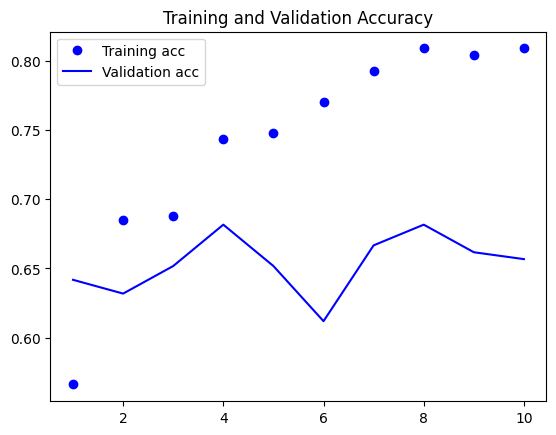

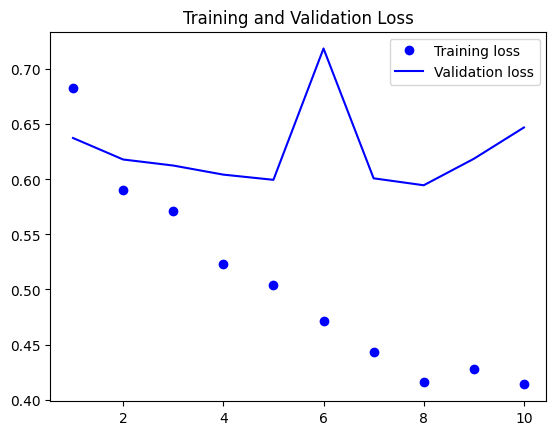

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
acc_median = np.median(acc)
acc_median

np.float64(0.7587499916553497)

- Answer for Question3: 0.72

### Question 4

In [16]:
loss_std = np.std(loss)
loss_std

np.float64(0.08414306031660708)

- Answer for Question4: 0.068

### Data Augmentation

In [17]:
datagen = ImageDataGenerator(
    rotation_range=50,           # Adjusted for a larger rotation range
    width_shift_range=0.1,       # Adjusted for a smaller width shift
    height_shift_range=0.1,      # Adjusted for a smaller height shift
    zoom_range=0.1,              # Adjusted for a smaller zoom range
    horizontal_flip=True,        # Horizontal flip for data augmentation
    fill_mode='nearest'          # Fill mode for missing pixels
)


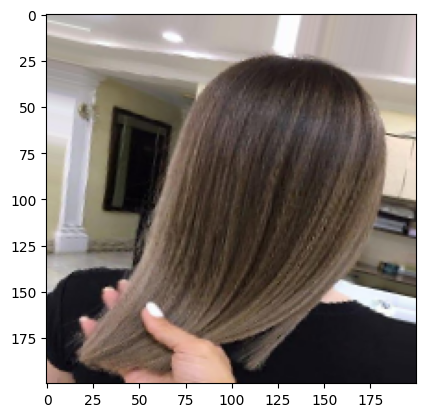

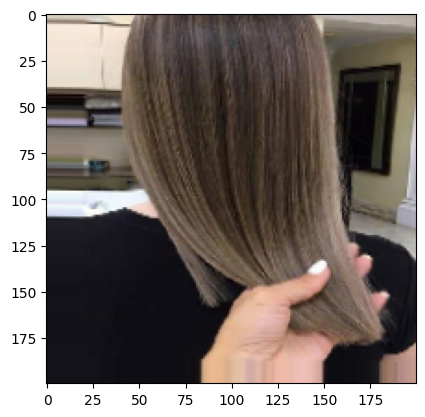

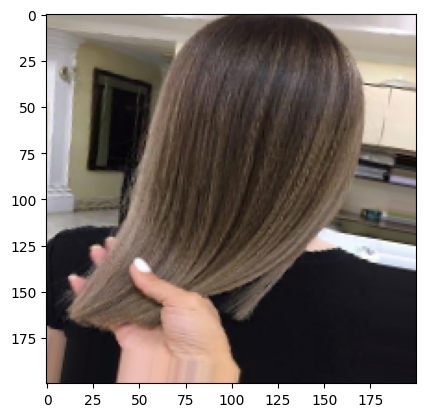

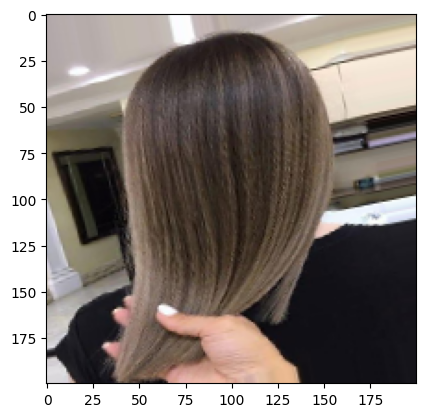

In [18]:
# Get image file names from the specified folder
fnames = [os.path.join(train_dir+"/straight", fname) for fname in os.listdir(train_dir+"/straight")]

# Load the first image from the list with target_size=(200, 200)
img_path = fnames[0]
img = image.load_img(img_path, target_size=(200, 200))

# Convert the image to an array
x = image.img_to_array(img)

# Reshape it to (1, height, width, channels) for the generator
x = x.reshape((1,) + x.shape)

# Generate augmented images and plot them
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Stop after generating 4 augmented images
        break

plt.show()

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range=50,           # Adjusted for a larger rotation range
    width_shift_range=0.1,       # Adjusted for a smaller width shift
    height_shift_range=0.1,      # Adjusted for a smaller height shift
    zoom_range=0.1,              # Adjusted for a smaller zoom range
    horizontal_flip=True,        # Horizontal flip for data augmentation
    fill_mode='nearest'          # Fill mode for missing pixels
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
test_datagen = ImageDataGenerator(
    rotation_range=50,           # Adjusted for a larger rotation range
    width_shift_range=0.1,       # Adjusted for a smaller width shift
    height_shift_range=0.1,      # Adjusted for a smaller height shift
    zoom_range=0.1,              # Adjusted for a smaller zoom range
    horizontal_flip=True,        # Horizontal flip for data augmentation
    fill_mode='nearest'          # Fill mode for missing pixels
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Adjusted for the new input size
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle data for training
)

Found 800 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,  # Use 'test_dir' for validation data
    target_size=(200, 200),  # Adjusted for the new input size
    batch_size=20,
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle data for testing
)


Found 201 images belonging to 2 classes.


In [23]:
# Fit the model using the .fit() method
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 526ms/step - acc: 0.5197 - loss: 2960.6501 - val_acc: 0.5124 - val_loss: 0.6929
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - acc: 0.5506 - loss: 0.6903 - val_acc: 0.5124 - val_loss: 0.6931
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 582ms/step - acc: 0.4709 - loss: 0.6935 - val_acc: 0.4876 - val_loss: 0.6934
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - acc: 0.4505 - loss: 0.6940 - val_acc: 0.4876 - val_loss: 0.6933
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 522ms/step - acc: 0.4701 - loss: 0.6933 - val_acc: 0.4876 - val_loss: 0.6932
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 515ms/step - acc: 0.4950 - loss: 0.6932 - val_acc: 0.5124 - val_loss: 0.6931
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 517ms/step - acc: 0.4647 - loss: 0.6931 - val_acc: 0.5075 - val_loss: 0.6931
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 510ms/step - acc: 0.5320 - loss: 0.6930 - val_acc: 0.5075 - val_loss: 0.6931
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 516

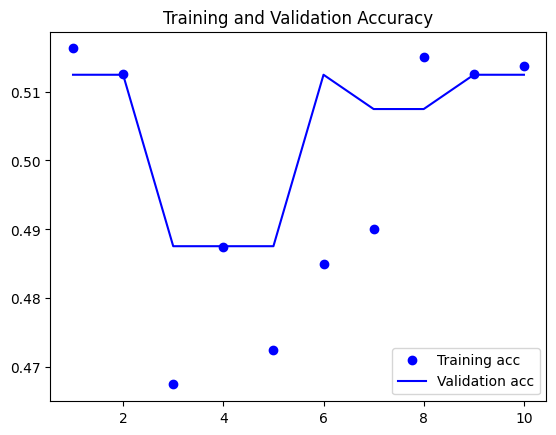

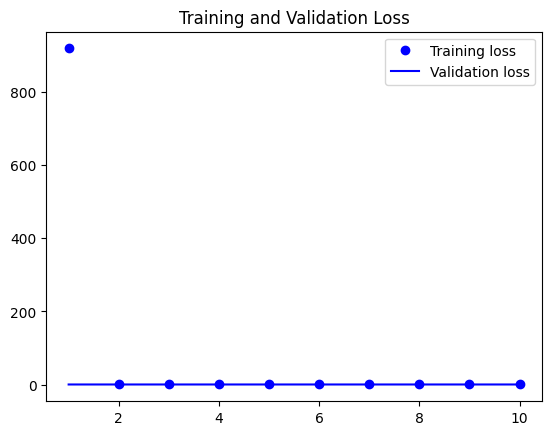

In [24]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Question 5

In [25]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

np.float64(0.6931157171726227)

- Answer for Question5: 0.86

### Question 6

In [26]:
val_acc_aug[5:10]

[0.5124378204345703,
 0.5074626803398132,
 0.5074626803398132,
 0.5124378204345703,
 0.5124378204345703]

In [27]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

np.float64(0.5104477643966675)

- Answer for Question6: 0.51